In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_imgaes/image111.webp')
img.shape

(474, 474, 3)

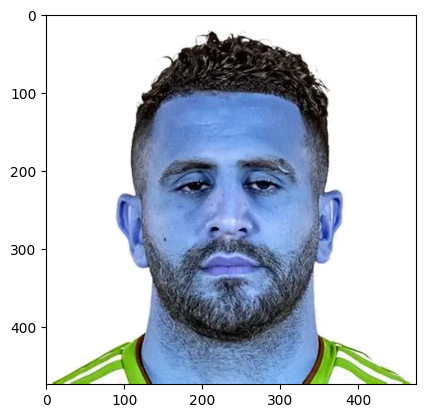

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(474, 474)

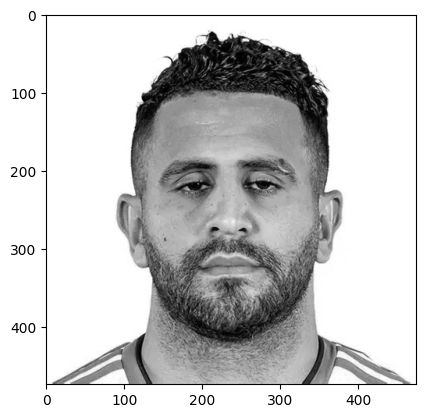

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.1,5)
faces

array([[ 82,  97, 304, 304]], dtype=int32)

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(82), np.int32(97), np.int32(304), np.int32(304))

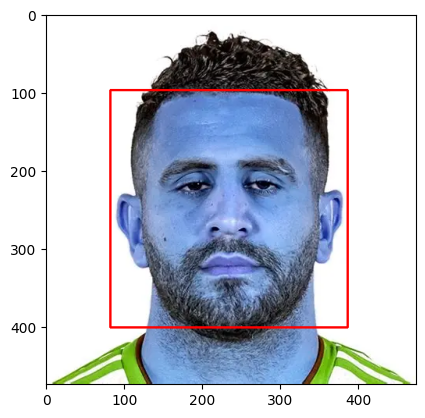

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,0),2)
plt.imshow(face_img)

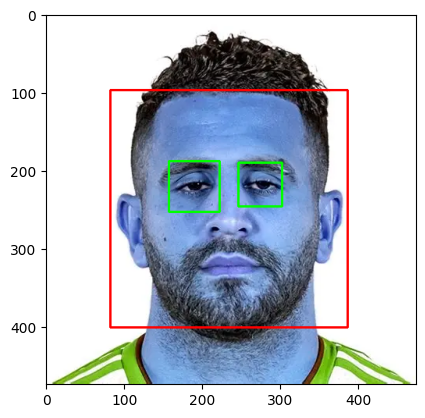

In [273]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

### (3) Preprocessing: Use wavelet transform as a feature for traning our model

In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [9]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


In [325]:
im_har = w2d(cropped_im,'db1',5)
plt.imshow(im_har, cmap='gray')

NameError: name 'cropped_im' is not defined

Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region
Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [10]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

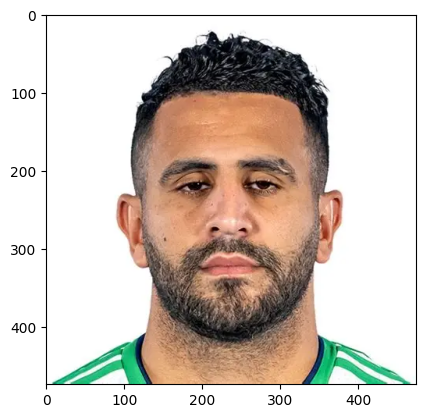

In [11]:
original_image = cv2.imread(r'C:\Users\modou\OneDrive\Desktop\Projects\African_player_classification\Model\test_imgaes\image111.webp')

if original_image is None:
    print("CRITICAL ERROR: Image not loaded. The path is incorrect.")
else:
    # If the image loads, you can safely display it (with BGR to RGB conversion)
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    plt.imshow(original_image_rgb)
    plt.show()

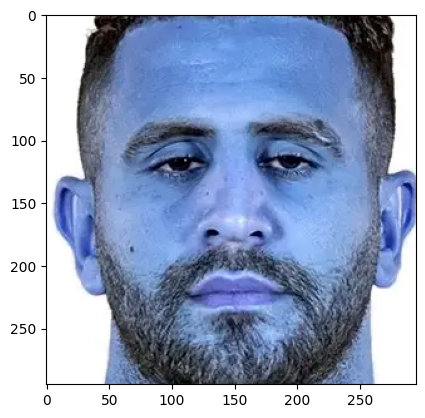

In [12]:
cropped_image = get_cropped_image_if_2_eyes(r'C:\Users\modou\OneDrive\Desktop\Projects\African_player_classification\Model\test_imgaes\image111.webp')
plt.imshow(cropped_image)

Failed to crop image: Either no face found, or less than 2 eyes detected.


In [329]:
path_to_data = "./Dataset/"
path_to_cr_data = "./Dataset/cropped/"

In [290]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [291]:
img_dirs

['./Dataset/achraf_hakimi',
 './Dataset/Mohamed Salah',
 './Dataset/Riyad Mahrez',
 './Dataset/Sadio Mane',
 './Dataset/Victor Osimhen',
 './Dataset/Yankuba Minteh']

In [292]:

import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [17]:
import os
import cv2
import shutil

path_to_data = "./Dataset/"
path_to_cr_data = "./Dataset/cropped/"

# Step 1: Collect all subfolders inside Dataset/
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

# Step 2: Reset cropped directory
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.makedirs(path_to_cr_data)

# Step 3: Crop faces and save
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)
    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        if entry.is_file():
            img = cv2.imread(entry.path)
            if img is None:
                print(f" Skipping unreadable file: {entry.path}")
                continue

            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder:", cropped_folder)

                cropped_file_name = f"{celebrity_name}{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

print("\n Cropping complete!")
for name, files in celebrity_file_names_dict.items():
    print(f"{name}: {len(files)} images cropped.")


Generating cropped images in folder: ./Dataset/cropped/achraf_hakimi
Generating cropped images in folder: ./Dataset/cropped/Mohamed Salah
Generating cropped images in folder: ./Dataset/cropped/Riyad Mahrez
 Skipping unreadable file: ./Dataset/Riyad Mahrez\Image113.avif
Generating cropped images in folder: ./Dataset/cropped/Yankuba Minteh

 Cropping complete!
achraf_hakimi: 44 images cropped.
Mohamed Salah: 41 images cropped.
Riyad Mahrez: 37 images cropped.
Yankuba Minteh: 14 images cropped.


In [18]:
print("\n Cropping complete!")
for name, files in celebrity_file_names_dict.items():
    print(f"{name}: {len(files)} images cropped.")



 Cropping complete!
achraf_hakimi: 44 images cropped.
Mohamed Salah: 41 images cropped.
Riyad Mahrez: 37 images cropped.
Yankuba Minteh: 14 images cropped.


In [19]:
import os
import cv2
import numpy as np
import random

# Paths
celebrity_name = ["Yankuba Minteh"]
path_to_cr_data = "./Dataset/cropped/"

def augment_image(img):
    # Horizontal flip with 50% chance
    if random.random() < 0.5:
        img = cv2.flip(img, 1)
    
    # Small rotation
    angle = random.randint(-15, 15)
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    
    # Slight brightness change
    factor = 0.9 + 0.2 * random.random()  # 0.9 to 1.1
    img = np.clip(img * factor, 0, 255).astype(np.uint8)
    
    return img

augment_count = 2

for celebrity in celebrity_name:
    player_aug_folder = os.path.join(path_to_cr_data, celebrity)
    if not os.path.exists(player_aug_folder):
        print(f"Folder not found: {player_aug_folder}")
        continue
    
    image_files = [f for f in os.listdir(player_aug_folder) if f.endswith((".png", ".jpg", ".jpeg"))]
    
    for file_name in image_files:
        img_path = os.path.join(player_aug_folder, file_name)
        img = cv2.imread(img_path)
        if img is None:
            continue
        
        for i in range(augment_count):
            aug_img = augment_image(img)
            new_file_name = f"{os.path.splitext(file_name)[0]}_aug{i+1}.png"
            cv2.imwrite(os.path.join(player_aug_folder, new_file_name), aug_img)
    
    print(f" Augmentation complete for {celebrity}. Total images now: {len(os.listdir(player_aug_folder))}")


 Augmentation complete for Yankuba Minteh. Total images now: 42


## Manually examine the cropped folder and delete any unwanted images

In [20]:

class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict


{'achraf_hakimi': 0,
 'Mohamed Salah': 1,
 'Riyad Mahrez': 2,
 'Yankuba Minteh': 3}

#### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [21]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [22]:
len(X[0])

4096

In [23]:

32*32*3 + 32*32

4096

In [24]:
X[0]

array([[  0],
       [  0],
       [  0],
       ...,
       [ 13],
       [250],
       [  1]], shape=(4096, 1), dtype=uint8)

In [25]:

y[0]

0

In [26]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(136, 4096)

### Data cleaning process is done.now we aready to train our model

In [27]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\modou\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\modou\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\modou\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\modou\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\modou\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\modou\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7941176470588235

In [29]:

print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       1.00      0.77      0.87        13
           2       0.57      0.89      0.70         9

    accuracy                           0.79        34
   macro avg       0.82      0.80      0.79        34
weighted avg       0.85      0.79      0.81        34




Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [31]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [32]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [36]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


C:\Users\modou\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\modou\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\modou\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.

,model,best_score,best_params
0,svm,0.902857,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.727619,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.843810,{'logisticregression__C': 1}


In [38]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [39]:

best_estimators['svm'].score(X_test,y_test)

0.8529411764705882

In [40]:
best_estimators['random_forest'].score(X_test,y_test)

0.7941176470588235

In [41]:

best_estimators['logistic_regression'].score(X_test,y_test)

0.7941176470588235

In [42]:

best_clf = best_estimators['svm']

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[11,  0,  0,  1],
       [ 0, 11,  2,  0],
       [ 1,  1,  7,  0],
       [ 0,  0,  0,  0]])

Text(70.72222222222221, 0.5, 'Truth')

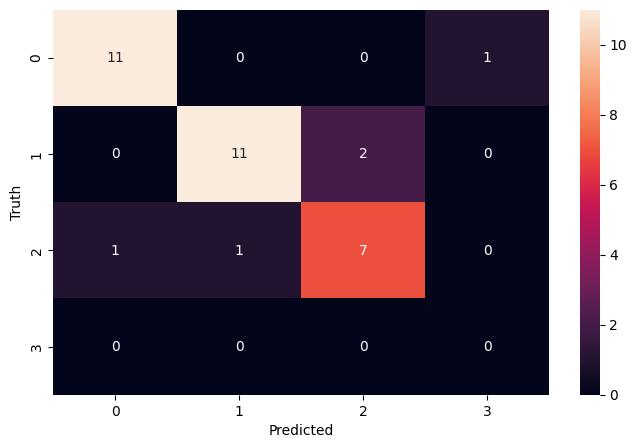

In [44]:
import seaborn as sn
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
class_dict

{'achraf_hakimi': 0,
 'Mohamed Salah': 1,
 'Riyad Mahrez': 2,
 'Yankuba Minteh': 3}

### Save the trained model

In [46]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [47]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))